# Required Libraries

In [23]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq
import string
import nltk
# Create object of stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Load Dataset

In [24]:
text = open('text.txt', encoding='utf-8').read().lower()
print('corpus length:', len(text))

corpus length: 581889


# Preprocessing Data

In [25]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [26]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

# Feature Engineering

In [27]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [28]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

In [29]:
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [30]:
print(X[0][0])

[False False False ... False False False]


# Model Building

In [35]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               4264960   
_________________________________________________________________
dense (Dense)                (None, 8201)              1057929   
_________________________________________________________________
activation (Activation)      (None, 8201)              0         
Total params: 5,322,889
Trainable params: 5,322,889
Non-trainable params: 0
_________________________________________________________________


# Training

In [11]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=100, shuffle=True).history

Epoch 1/100
811/811 [==============================] - 73s 89ms/step - loss: 6.3491 - accuracy: 0.0834 - val_loss: 6.9882 - val_accuracy: 0.1001
Epoch 2/100
811/811 [==============================] - 71s 88ms/step - loss: 5.6191 - accuracy: 0.1461 - val_loss: 7.9371 - val_accuracy: 0.1031
Epoch 3/100
811/811 [==============================] - 71s 88ms/step - loss: 5.6830 - accuracy: 0.1795 - val_loss: 8.0536 - val_accuracy: 0.1066
Epoch 4/100
811/811 [==============================] - 71s 88ms/step - loss: 5.3342 - accuracy: 0.2179 - val_loss: 7.9957 - val_accuracy: 0.0970
Epoch 5/100
811/811 [==============================] - 72s 89ms/step - loss: 5.0230 - accuracy: 0.2626 - val_loss: 8.3527 - val_accuracy: 0.0948
Epoch 6/100
811/811 [==============================] - 71s 88ms/step - loss: 4.7303 - accuracy: 0.3057 - val_loss: 8.6007 - val_accuracy: 0.0875
Epoch 7/100
811/811 [==============================] - 71s 88ms/step - loss: 4.4631 - accuracy: 0.3523 - val_loss: 8.7509 - val_ac

Epoch 57/100
811/811 [==============================] - 72s 88ms/step - loss: 2.7380 - accuracy: 0.7038 - val_loss: 12.1424 - val_accuracy: 0.0564
Epoch 58/100
811/811 [==============================] - 72s 89ms/step - loss: 2.7283 - accuracy: 0.7030 - val_loss: 12.3443 - val_accuracy: 0.0553
Epoch 59/100
811/811 [==============================] - 72s 88ms/step - loss: 2.7105 - accuracy: 0.7072 - val_loss: 12.3905 - val_accuracy: 0.0531
Epoch 60/100
811/811 [==============================] - 72s 88ms/step - loss: 2.7185 - accuracy: 0.7063 - val_loss: 11.8912 - val_accuracy: 0.0569
Epoch 61/100
811/811 [==============================] - 72s 88ms/step - loss: 2.7050 - accuracy: 0.7073 - val_loss: 12.2748 - val_accuracy: 0.0536
Epoch 62/100
811/811 [==============================] - 72s 89ms/step - loss: 2.6952 - accuracy: 0.7099 - val_loss: 12.2663 - val_accuracy: 0.0553
Epoch 63/100
811/811 [==============================] - 71s 88ms/step - loss: 2.6983 - accuracy: 0.7093 - val_loss: 11

# Save Model

In [12]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))

model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

# Evaluating Model

Text(0.5, 0, 'epoch')

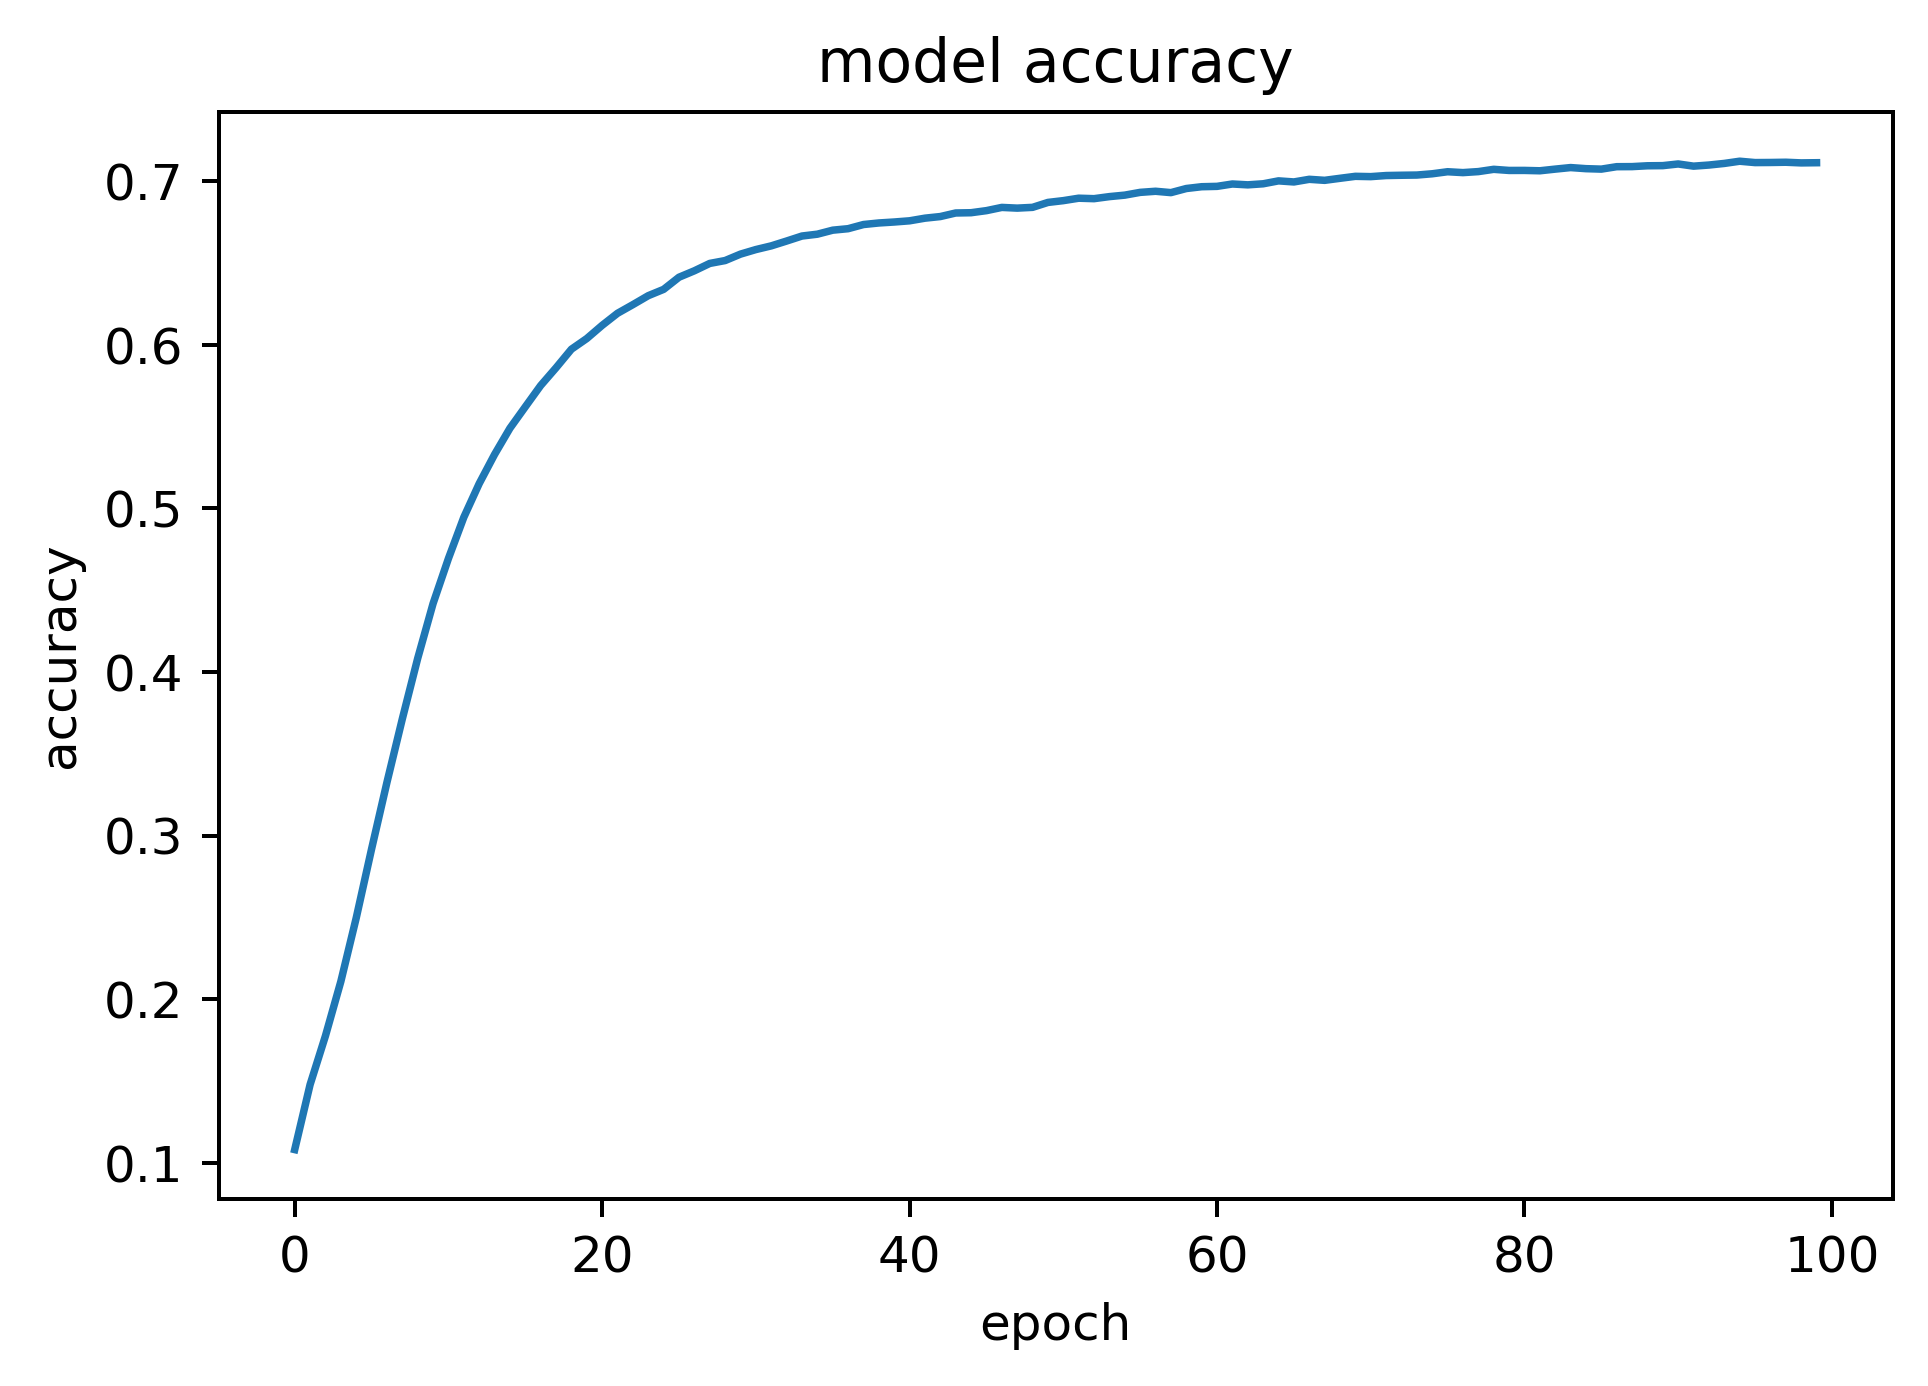

In [24]:
plt.figure(figsize=(6,4), dpi=360)
plt.plot(history['accuracy'])
# plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

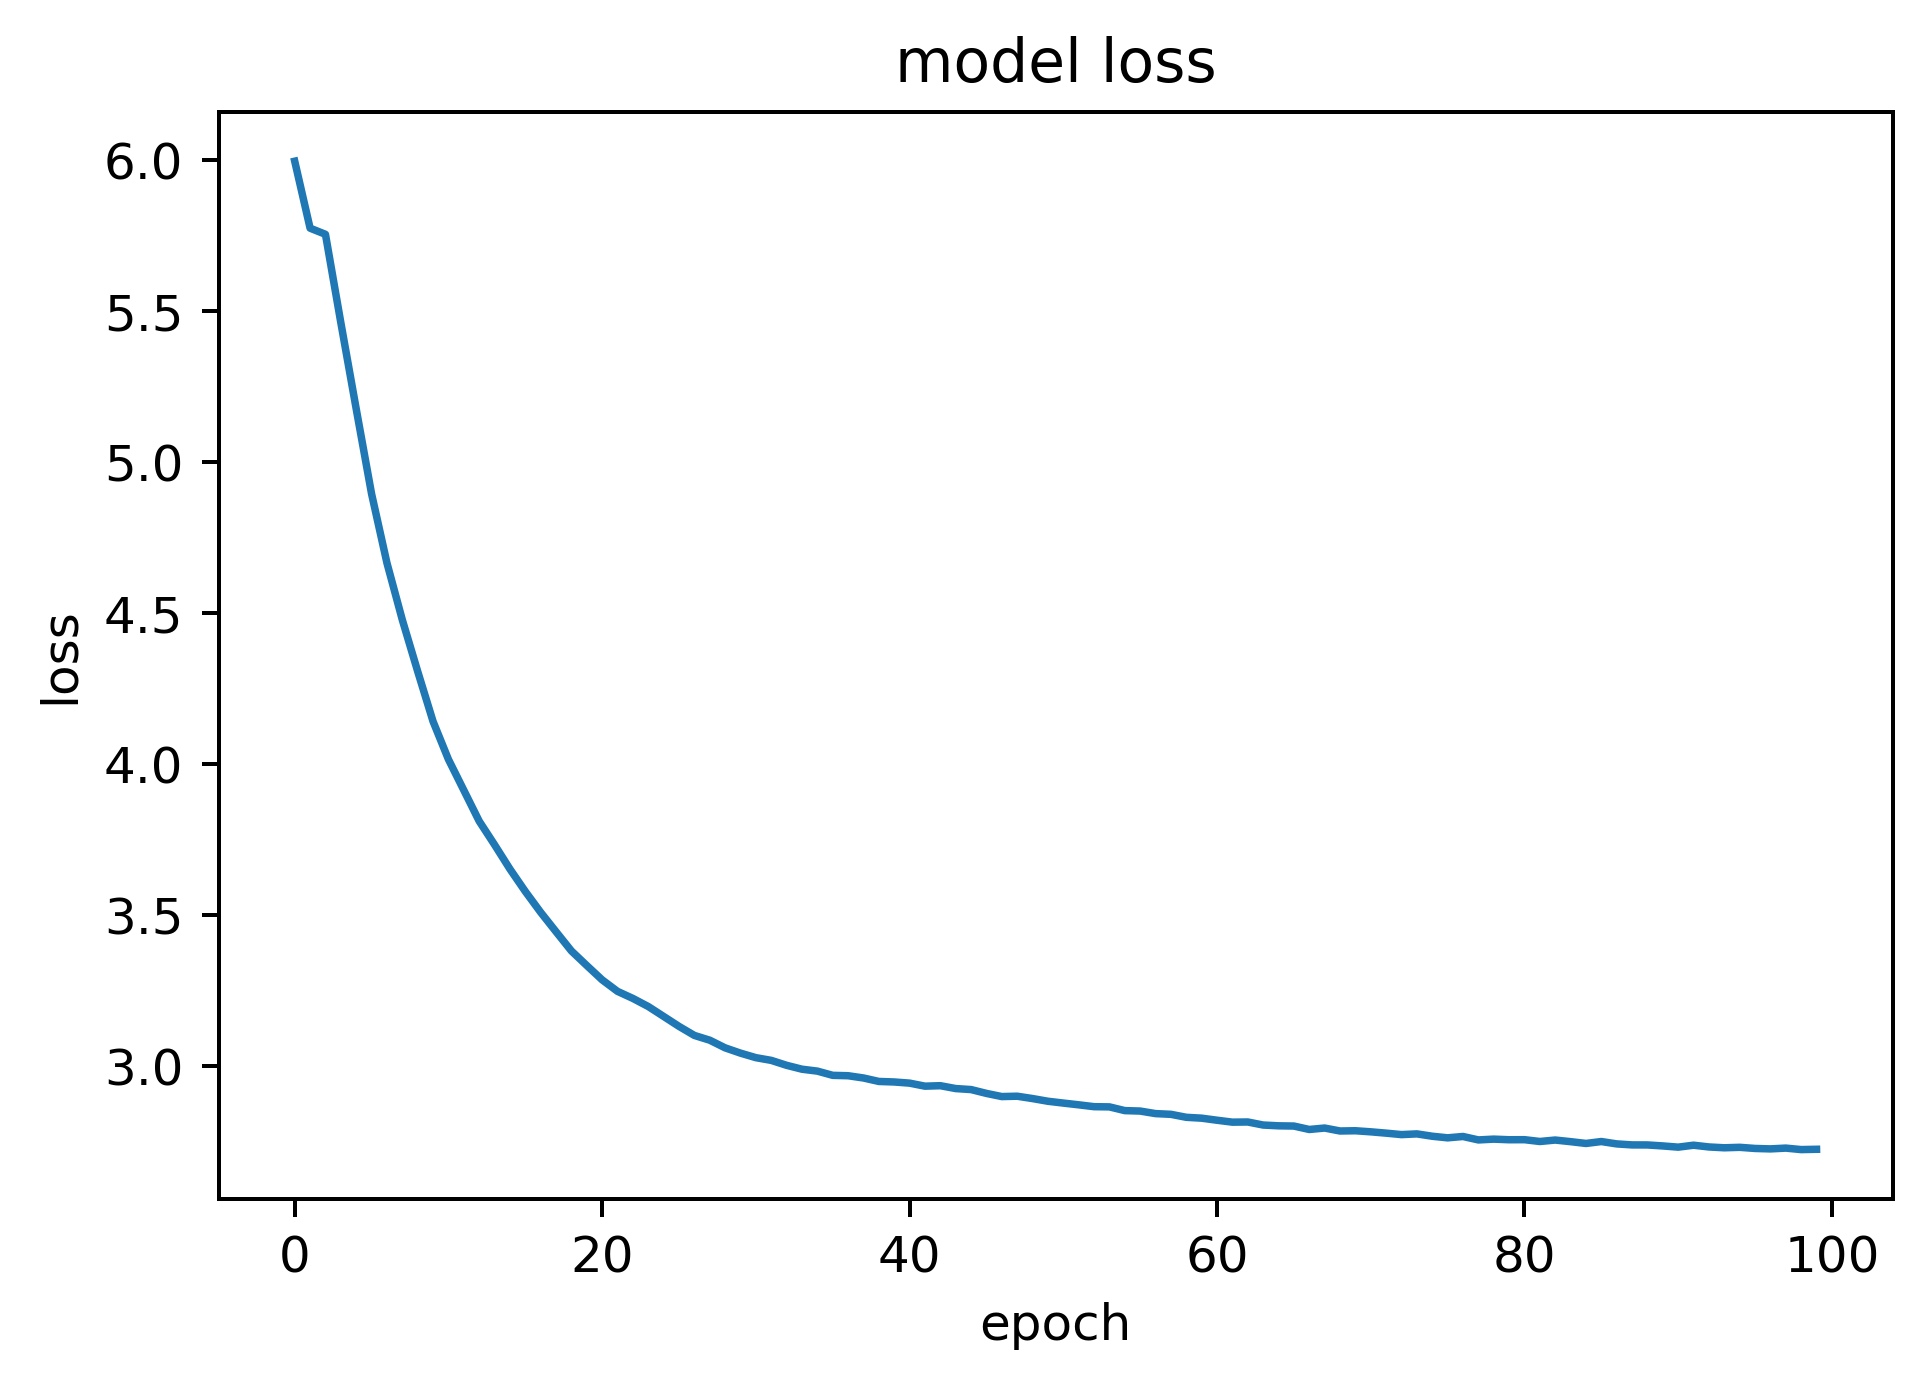

In [21]:
plt.figure(figsize=(6,4), dpi=360)
plt.plot(history['loss'])
# plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Testing Next Word

In [31]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a".lower())

it
is
not
a


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [32]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [33]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

# Prediction

In [38]:
q =  "It is a sunny day, I like to go"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  It is a sunny day, I like to go
Sequence:  it is a sunny day
it
is
a
sunny


KeyError: 'sunny'